<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo3_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Módulo 3 - Análise e Previsão de Séries Temporais
---

## Aula 01 - Entendendo a série temporal



### Coleta de dados e primeiras análises

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
# pd.options.display.float_format = "{:.2f}".format

In [2]:
#url onde está a nossa base de dados
url = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'

#carrego as informações para a variável dados (a base está no formato csv mas em um arquivo zipado)
dados = pd.read_csv(url, compression='zip', engine='python', sep=";", thousands=".", decimal=",")
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9


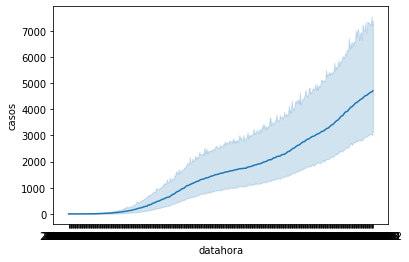

In [3]:
sns.lineplot(data=dados, x='datahora', y='casos')

In [4]:
#informar ao pandas que a coluna [datahora] é do tipo datetime
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

#Configurando parâmetros default para o mpl
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.figsize'] = (18,8)

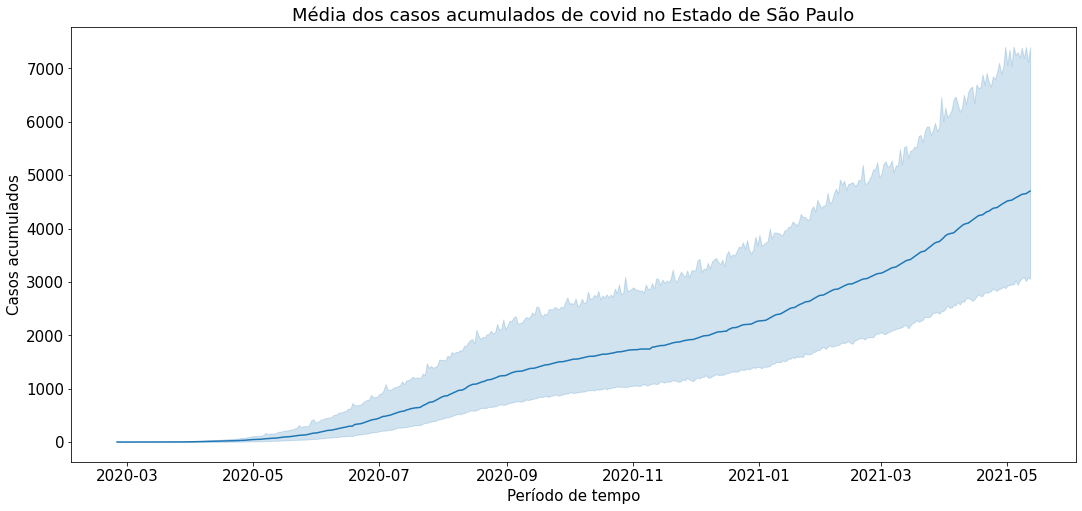

In [5]:
sns.lineplot(data=dados, x='datahora', y='casos')
plt.title('Média dos casos acumulados de covid no Estado de São Paulo')
plt.ylabel('Casos acumulados')
plt.xlabel('Período de tempo')
plt.show()

$$ e^x $$


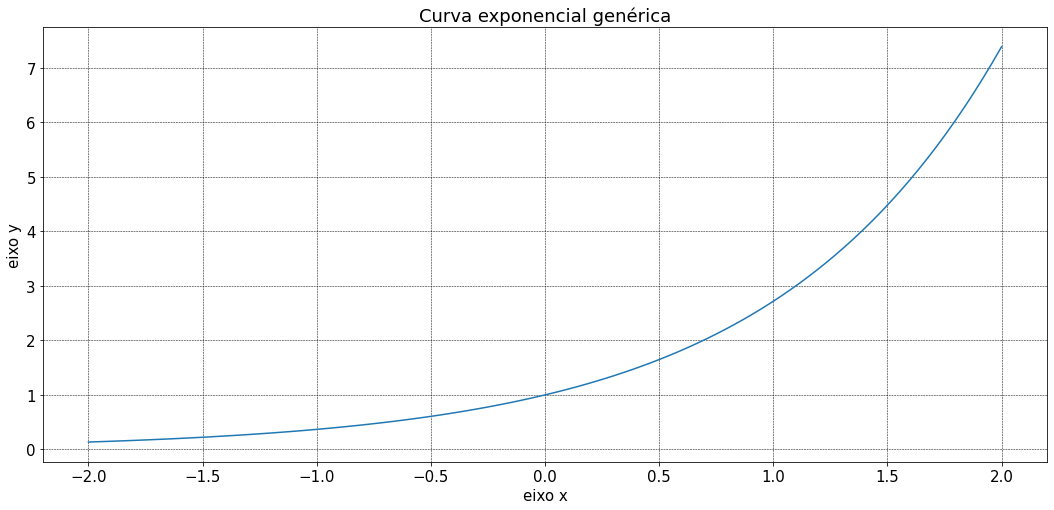

In [6]:
eixo_x = np.linspace(-2,2,100)
eixo_y = np.exp(eixo_x)

sns.lineplot(x=eixo_x, y=eixo_y)
plt.title('Curva exponencial genérica')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

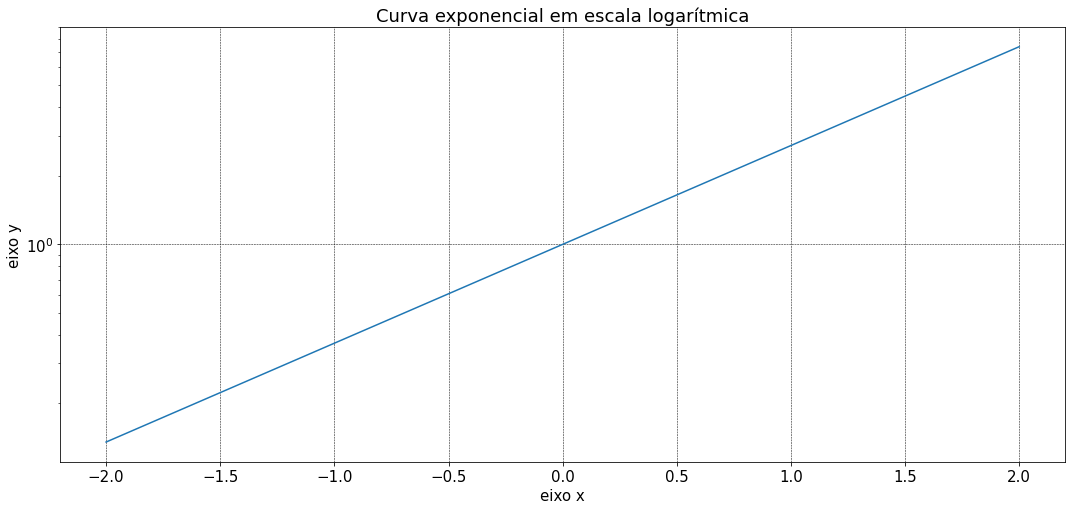

In [7]:
sns.lineplot(x=eixo_x, y=eixo_y)
plt.title('Curva exponencial em escala logarítmica')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.yscale('log')

In [8]:
dados_sp = dados.query("nome_munic == 'São Paulo'")
# dados_sp.head()

In [9]:
# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates

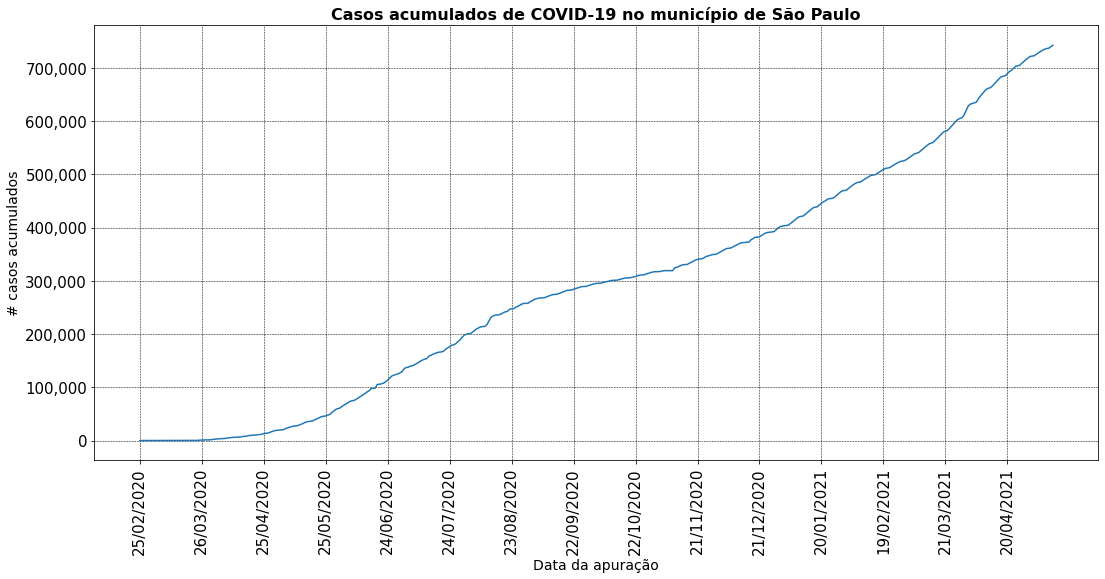

In [10]:
ax = sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.title('Casos acumulados de COVID-19 no município de São Paulo', 
          fontsize=16, fontweight='bold' )
plt.xlabel('Data da apuração', fontsize=14)
plt.ylabel('# casos acumulados', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 90)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.show()

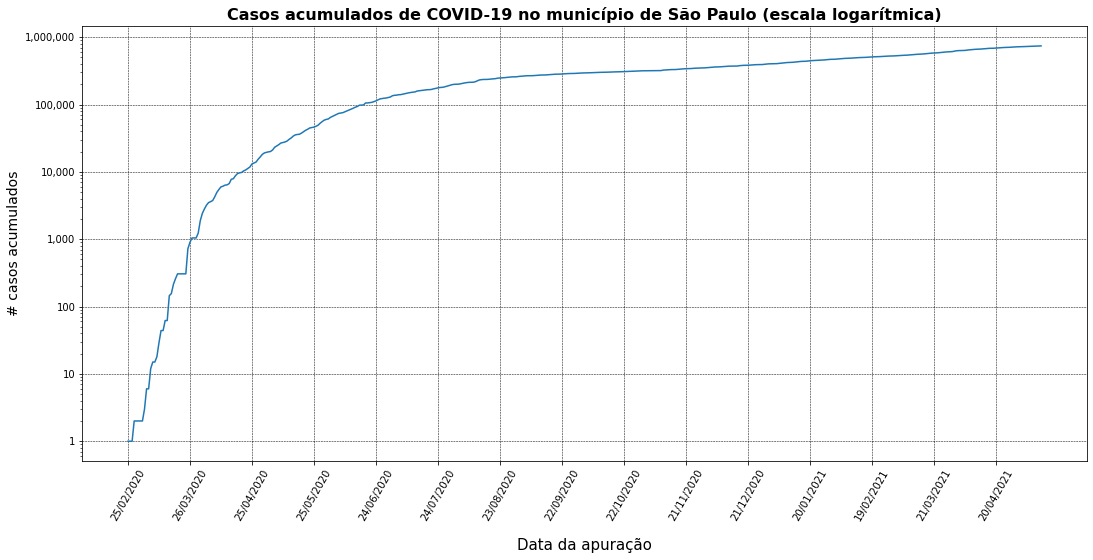

In [11]:
ax = sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.title('Casos acumulados de COVID-19 no município de São Paulo (escala logarítmica)', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('# casos acumulados', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
plt.yscale('log')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.show()

#gráfico monolog - gráfico baseado em escala logarítmica

####**Desafios #1**

**Desafio 01** - Filtrar a base com alguma outra função

**Desafio 02** - Escolher outro município para fazer a análise

##### **Desafio 01 - Filtros**

* indexação booleana
* indexação posicional
* Encadeamento de Pandas utiliizando .eq()
* Utilizando a função isin()
* Negação de filtro com ( ~ )

In [12]:
# Filtrando usando indexação booleana

df_filtro = dados['nome_munic'] == 'Registro'

dados_Registro = dados[df_filtro]
dados_Registro.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
477,Registro,3542602,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
1122,Registro,3542602,26,2,2020-02-26,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
1767,Registro,3542602,27,2,2020-02-27,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
2412,Registro,3542602,28,2,2020-02-28,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
3057,Registro,3542602,29,2,2020-02-29,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9


In [13]:
# Filtrando utilizando indexação posicional

posicoes = np.flatnonzero(df_filtro)
dados_Registro2 = dados.iloc[posicoes]
dados_Registro2.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
477,Registro,3542602,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
1122,Registro,3542602,26,2,2020-02-26,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
1767,Registro,3542602,27,2,2020-02-27,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
2412,Registro,3542602,28,2,2020-02-28,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9
3057,Registro,3542602,29,2,2020-02-29,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,54216,8438,7222,0,8.0,-24.4979,-47.8449,9


In [14]:
# Filtrando com Encadeamento de Pandas utiliizando .eq()

dados_campinas = dados[dados.nome_munic.eq('Campinas')]
dados_campinas.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9
2043,Campinas,3509502,28,2,2020-02-28,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9
2688,Campinas,3509502,29,2,2020-02-29,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9


In [15]:
# Filtrando utilizando a função isin()

filtro_municipios = ['Iguape','Ribeirão Preto','Salto']
outros_municipios = dados[dados.nome_munic.isin(filtro_municipios)]
outros_municipios.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
231,Iguape,3520301,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,29465,5406,19788,0,8.0,-24.6990,-47.5537,9
487,Ribeirão Preto,3543402,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,-21.1699,-47.8099,9
507,Salto,3545209,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Sorocaba,13,Sorocaba,6,115372,16885,13306,0,8.0,-23.1996,-47.2931,9
876,Iguape,3520301,26,2,2020-02-26,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Registro,16,Registro,9,29465,5406,19788,0,8.0,-24.6990,-47.5537,9
1132,Ribeirão Preto,3543402,26,2,2020-02-26,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,-21.1699,-47.8099,9


In [16]:
# Negando o filtro com ( ~ )

demais_municipios = dados[ ~ dados.nome_munic.isin(filtro_municipios)]
demais_municipios.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00",0.0,0,0,"0,000000e+00",0.0,0.0,RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9


##### **Desafio 02 - Outros municípios**

Preferi fazer uma escolha aleatória entre os municípios disponíveis

In [17]:
# lista de Municipios
municipios = dados.nome_munic.unique()

# Município aleatório
import random
np.random.seed(687942)

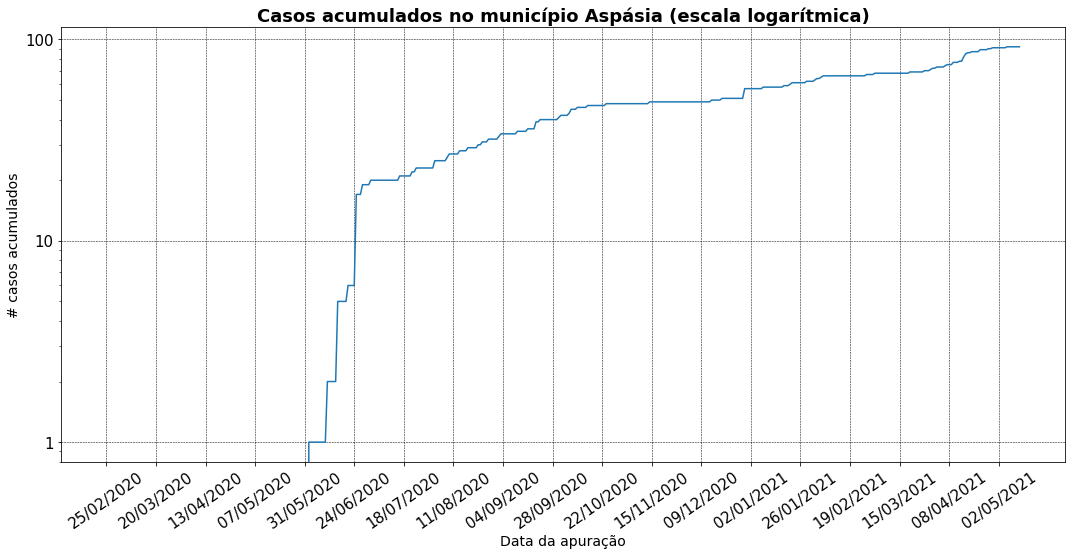

In [18]:
import matplotlib.ticker as ticker

numero = random.randrange(0, len(municipios))
municipio = municipios[numero]
ax = sns.lineplot(x='datahora', y='casos', data=dados[dados.nome_munic.eq(municipio)])
titulo = f"Casos acumulados no município {municipio} (escala logarítmica)"
plt.title(titulo, fontsize=18, fontweight='bold', color='black')
plt.xlabel('Data da apuração', fontsize=14)
plt.ylabel('# casos acumulados', fontsize=14)
plt.xticks(rotation = 35)

plt.yscale('log')
# o yscale afeta a apresetação do ticker y, por isso deve ser colocado após o yscale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

Alguns gráficos que chamaram a atenção!!!

* Rifaina
* Areiópolis
* Santa Gertrudes
* Anhembi
* Mirassol
* Echapoorã

### Taxa de crescimento e média móvel

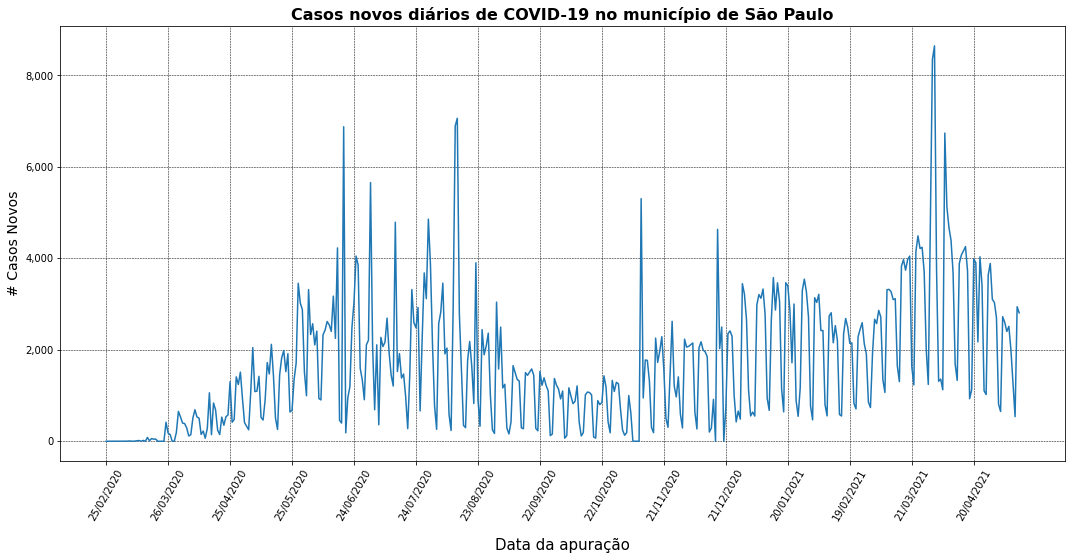

In [19]:
ax = sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)

plt.title('Casos novos diários de COVID-19 no município de São Paulo', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('# Casos Novos', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.show()

In [20]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))
# o resultado e a diferença do valor atual com o anterior
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


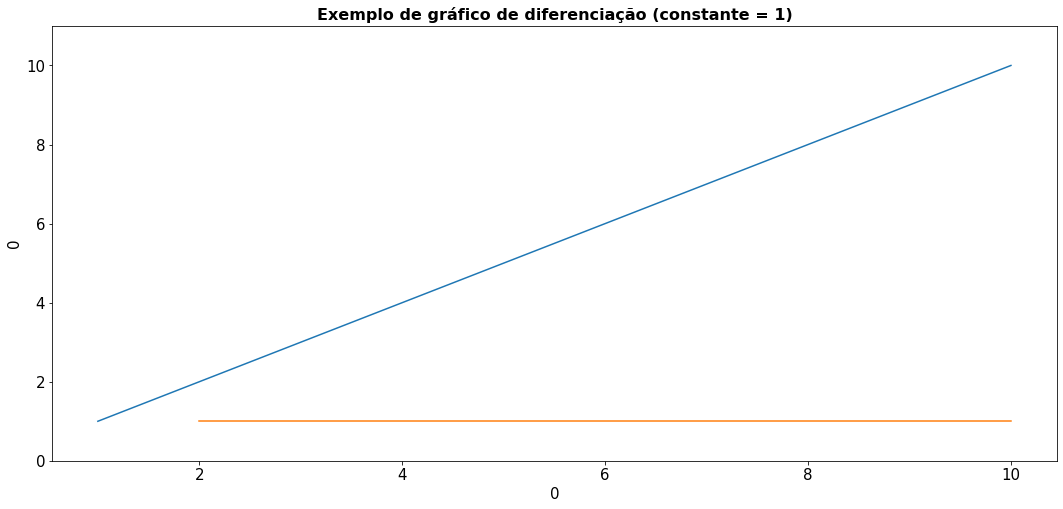

In [21]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)
plt.title('Exemplo de gráfico de diferenciação (constante = 1)', fontsize=16, fontweight='bold')
plt.ylim(0,11)
plt.show()

equação de reta

y = ax + b  <=== reta inclinada

A diferenciação me dá o coeficiente angular da reta, ângulo de crescimento dessa reta, no nosso caso é 1 (um)

A **diferenciação** me dá a **taxa de crescimento** de uma reta ou curva.


In [22]:
import warnings
warnings.filterwarnings('ignore')

dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

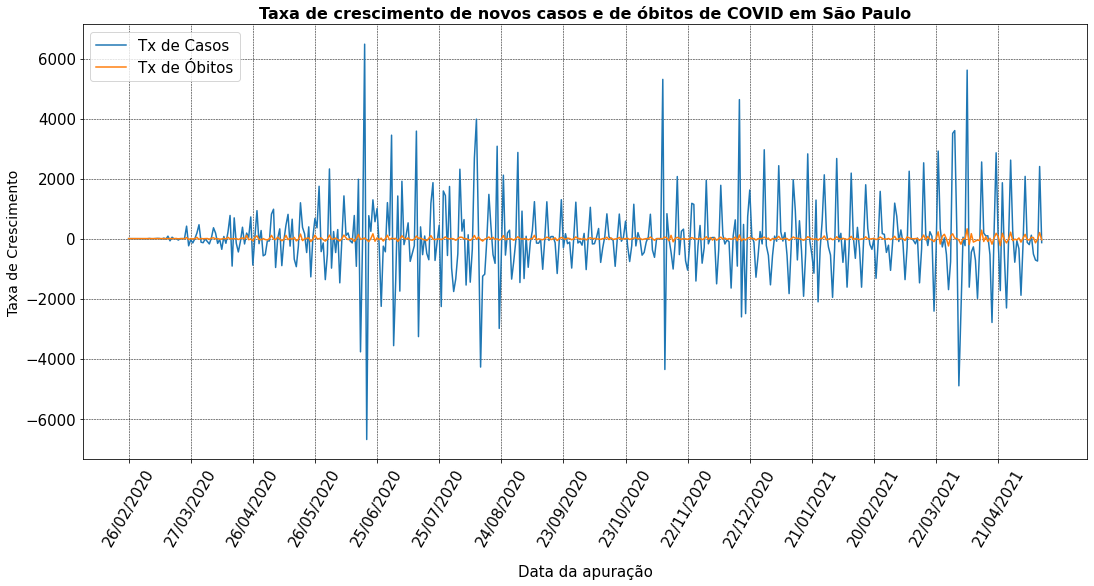

In [23]:
ax1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, label='Tx de Casos')
ax2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, label='Tx de Óbitos')
plt.title('Taxa de crescimento de novos casos e de óbitos de COVID em São Paulo', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('Taxa de Crescimento', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
plt.legend()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.show()

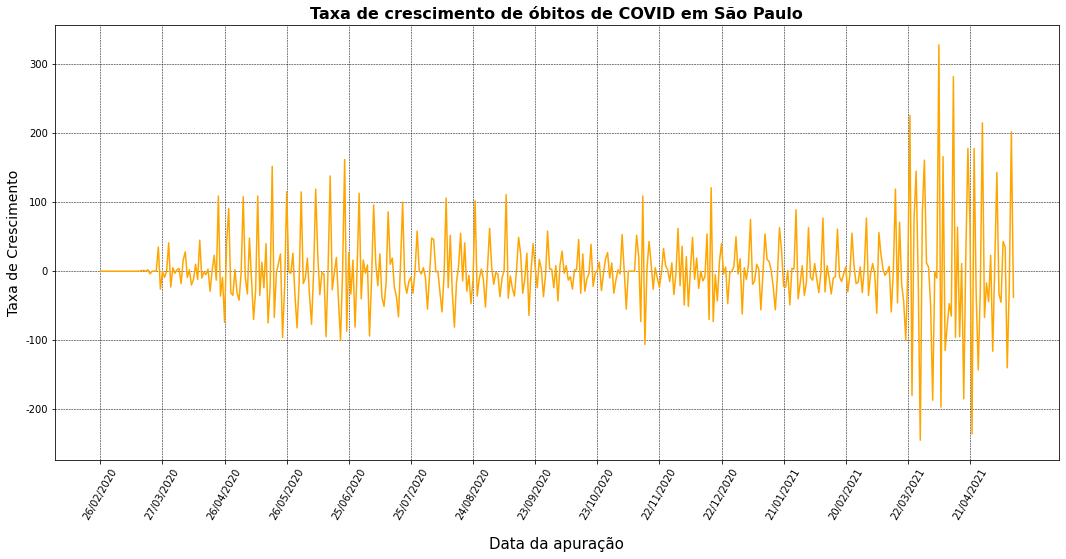

In [24]:
ax = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color = "orange")
plt.title('Taxa de crescimento de óbitos de COVID em São Paulo', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('Taxa de Crescimento', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.show()

<BarContainer object of 443 artists>

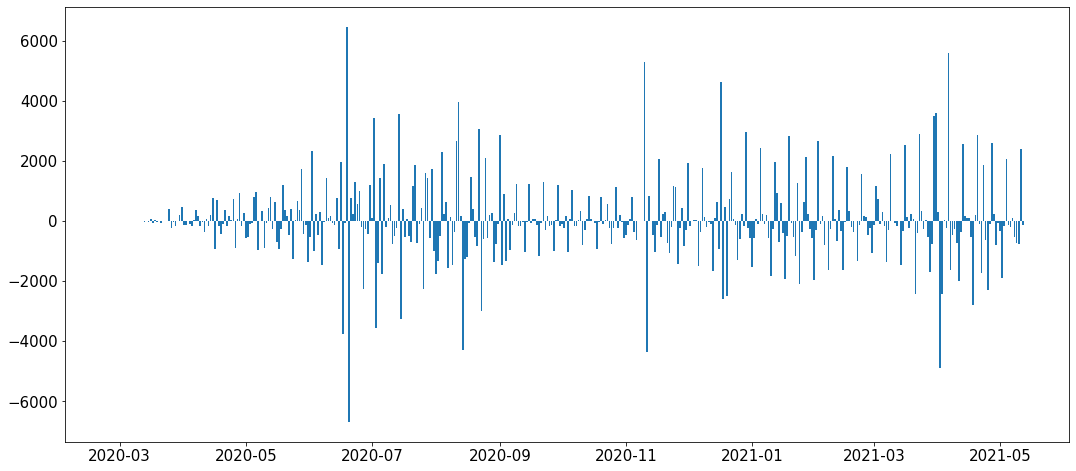

In [25]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [26]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_2021 = dados_sp[dados_sp.ano.eq(2021)]

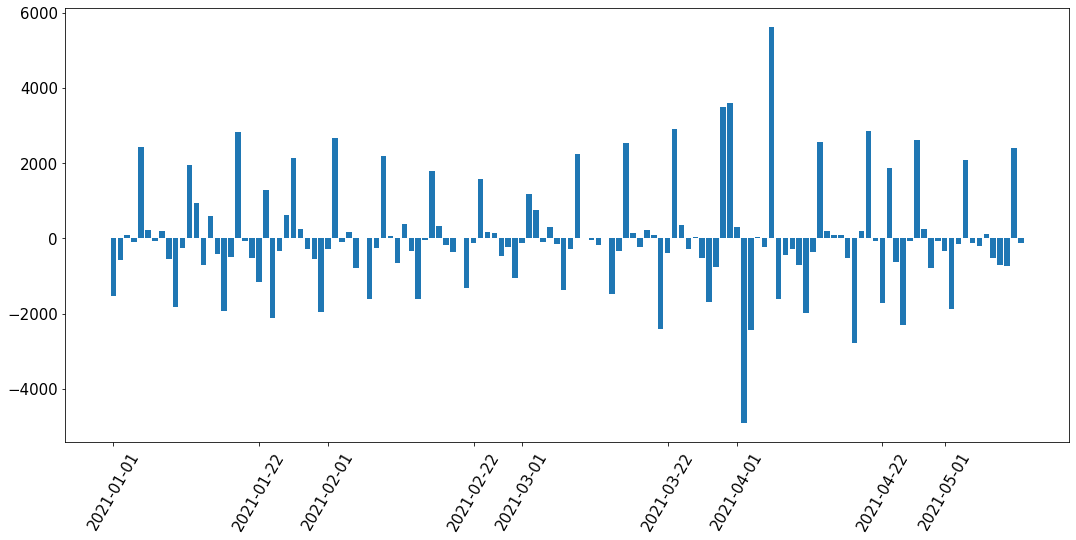

In [27]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])
plt.xticks(rotation = 60)
plt.show()

#### **Média Móvel**

In [28]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

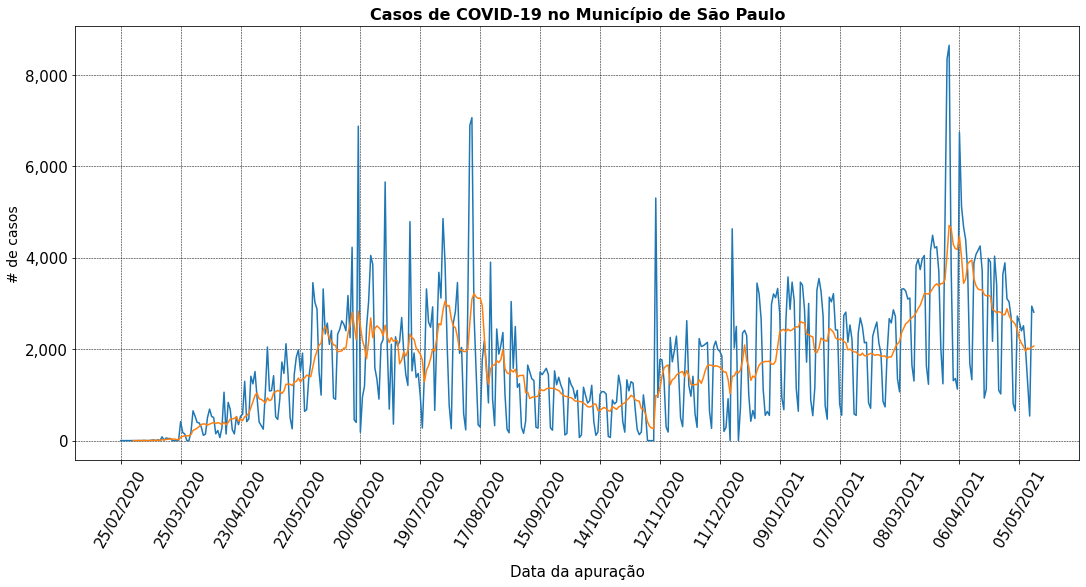

In [29]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)
plt.title('Casos de COVID-19 no Município de São Paulo', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('# de casos', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=29,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()

### Correlação e função de autocorrelação


#### **Sazonalidade**

Por correlação.

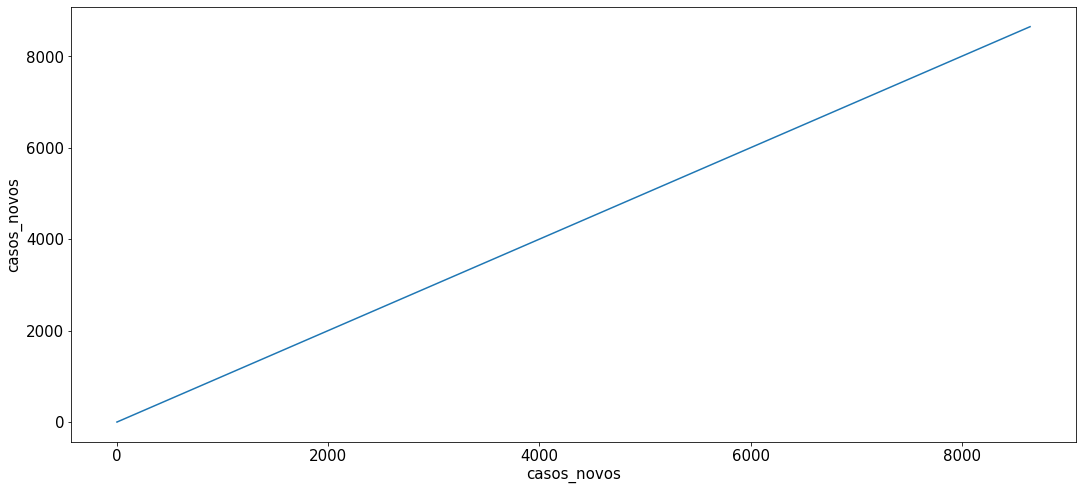

In [30]:
# Correlação perfeita e positiva pois estou avaliando casos_novos com casos_novos

sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

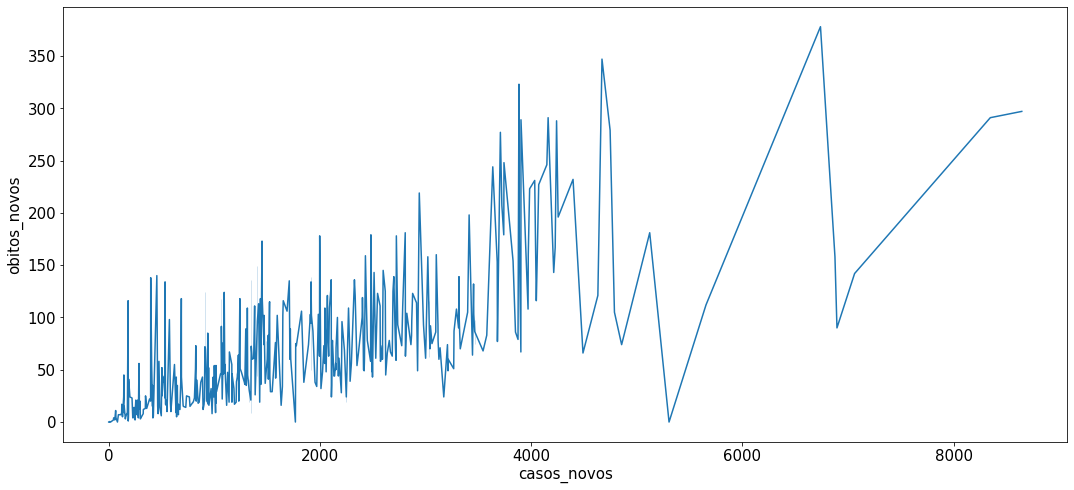

In [31]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [32]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')
# display(dados_202101.head())
# display(dados_202102.head())

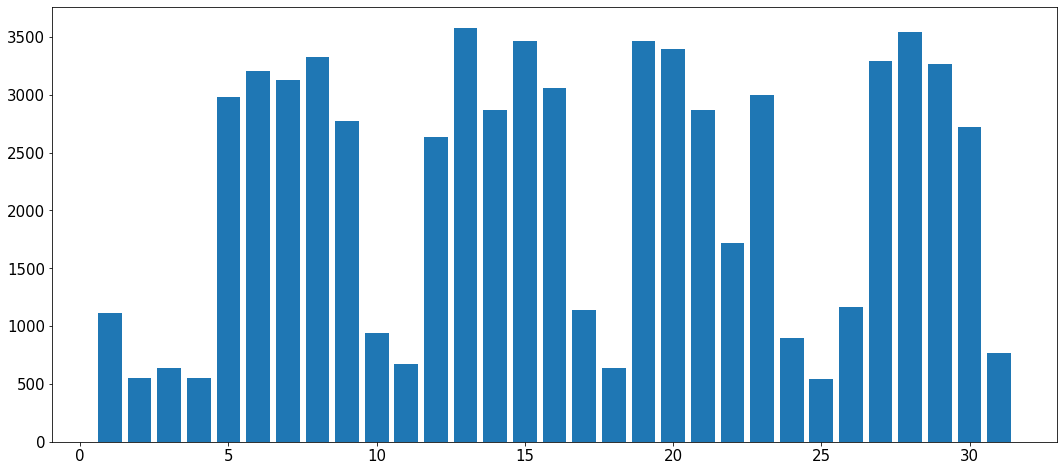

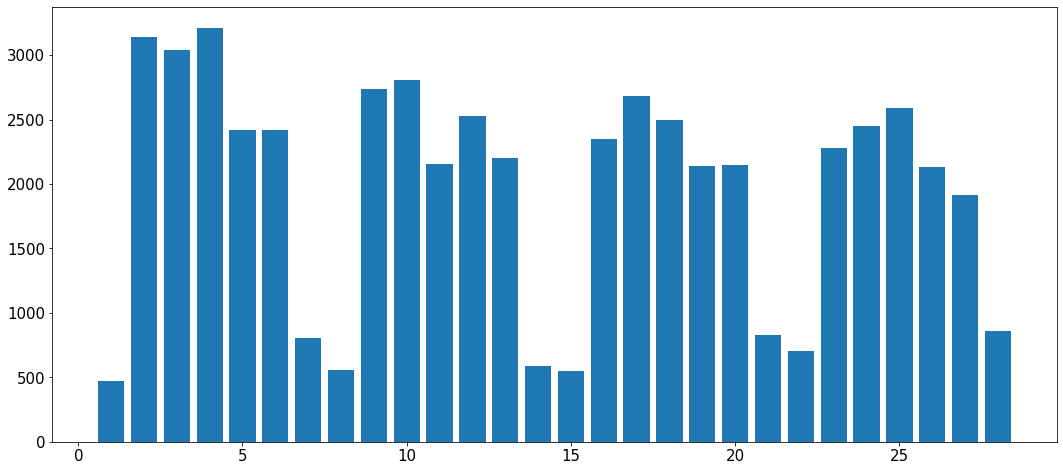

In [33]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])
plt.show()

 A **sazonalidade** é, portanto, uma variação do número, no nosso caso, do número  de casos novos, de acordo com a função temporal. Podem ser dias, horas, meses ou anos. Conseguimos, desta forma, identificar um padrão - repetição - dentro de uma função temporal (dentro de uma janela de tempo).

Para verificar uma sazonalidade em uma série temporal, temos uma outra ferramenta que chamamos de função de autocorrelação. Com ela, é possível gerar a correlação utilizando o próprio Pandas. Sendo assim, vamos importar uma função do Pandas:

In [34]:
from pandas.plotting import autocorrelation_plot

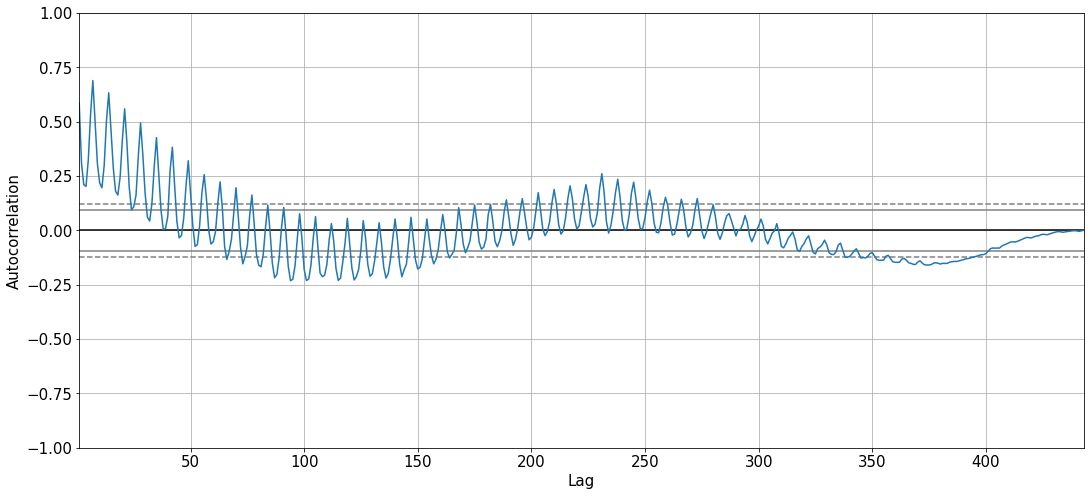

In [35]:
# gráfico em lags
autocorrelation_plot(dados_sp['casos_novos'])

In [36]:
# Testando correlações aleatórias para provar a correlação que fizemos
dados_sp.shape

(443, 31)

In [37]:
aleatorio = np.random.rand(443)

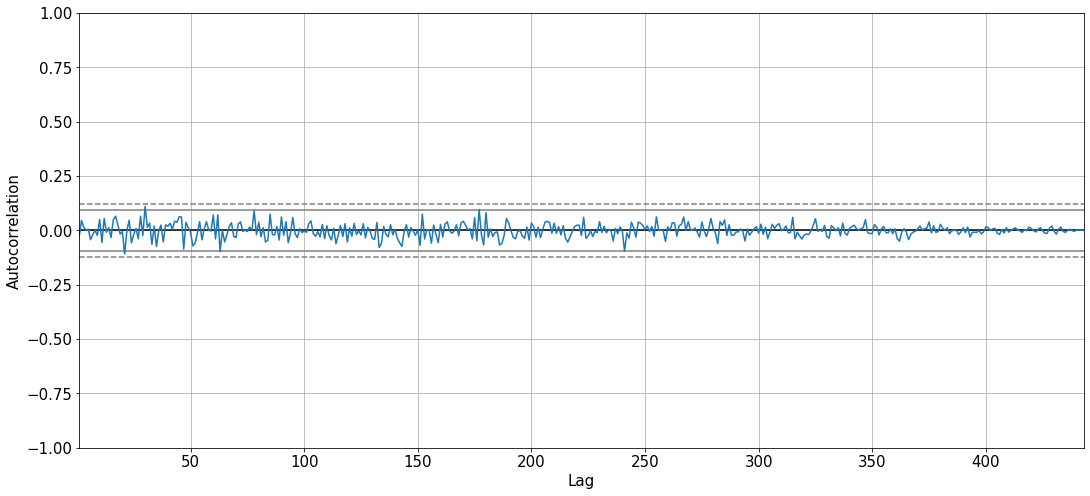

In [38]:
autocorrelation_plot(aleatorio)


Como os número estão dentro das linhas pontilhadas (entre -0,25 e 0,25), ou seja, correlações muito próximas a 0 (zero) são correlações espúrias.

### Desafios #2

**Desafio 01**: Um notebook sem warnings

**Desafio 02**: Pico taxa de casos novos coincide com taxa dos óbitos novos.

**Desafio 03**: Fazer melhorias nos gráficos.

**Desafio 04**: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras. (número de casos em barra e média em linha)

**Desafio 05**: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

**Desafio 06**: Função de correlação cruzada dos óbitos e casos.

**Desafio 07**: Estudar outros municípios.

#### Desafio 01 
Um notebook sem warnings

In [39]:
import warnings
warnings.filterwarnings('ignore') #ignora os avisos

# outra forma de impedir os warning 
pd.set_option('mode.chained_assignment', None)

#### Desafio 02
Pico taxa de casos novos coincide com taxa dos óbitos novos

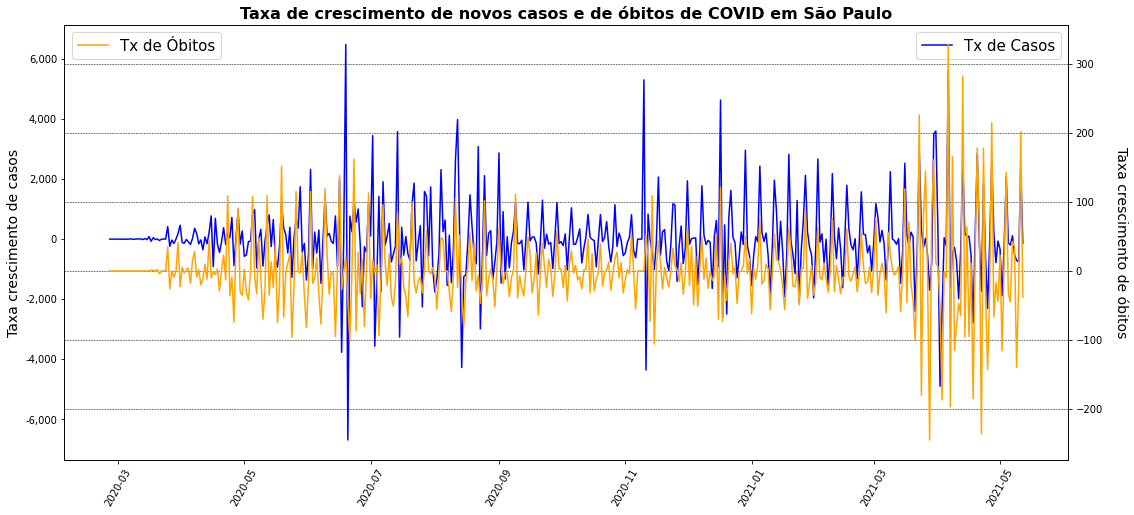

In [40]:
plt.title('Taxa de crescimento de novos casos e de óbitos de COVID em São Paulo', fontsize=16, fontweight='bold')

ax1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, label='Tx de Casos', color='blue')
ax1.set_ylabel('Taxa crescimento de casos', fontdict={ 'size': 14 })
ax1.set_xlabel('')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.twinx()

ax2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, label='Tx de Óbitos', color='orange')
ax2.set_ylabel('Taxa crescimento de óbitos', fontdict={ 'size': 14 }, labelpad=25, rotation=270)
ax2.set_xlabel('Data da apuração', fontdict={ 'size': 15 })

# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(10)
for label in (ax1.get_xticklabels() + ax2.get_xticklabels()):    
    label.set_rotation(60)

plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

#### Desafio 03

Alguns gráficos tiveram seus parâmetros de apresentação ajustados.

#### Desafio 04
Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras. (número de casos em barra e média em linha)



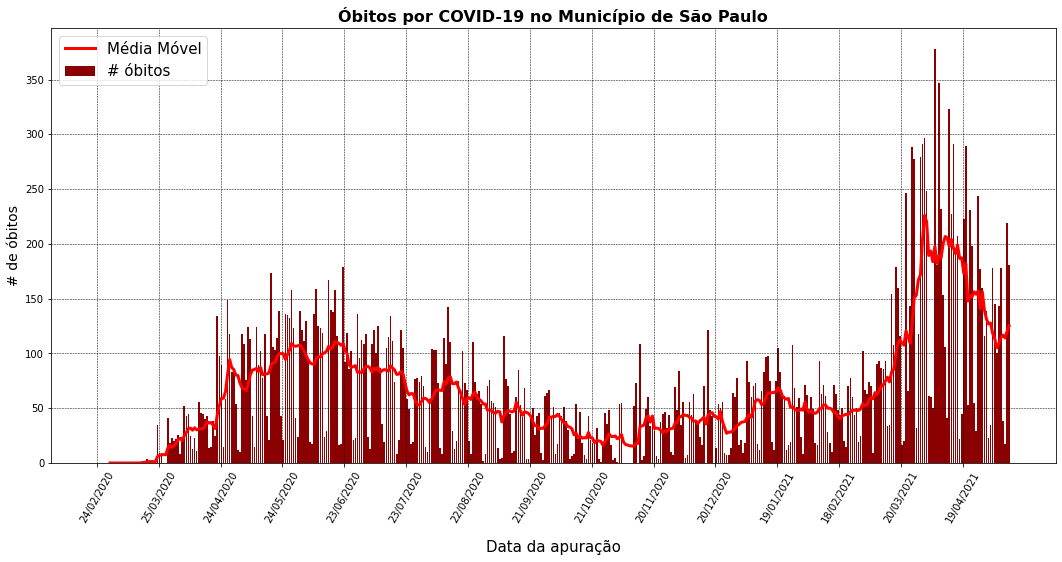

In [41]:
plt.bar(dados_sp['datahora'], dados_sp['obitos_novos'], label = "# óbitos", color = 'darkred')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color = "red", linewidth = 3, label = "Média Móvel")

plt.title('Óbitos por COVID-19 no Município de São Paulo', fontsize=16, fontweight='bold')
plt.xlabel('Data da apuração', fontsize=15, labelpad=15)
plt.ylabel('# de óbitos', fontsize=14)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.show()

#### Desafio 05

Mover o número de óbitos alguns dias para verificar o resultado no gráfico.
Verificar se há correlação entre casos novos e óbitos novos com um deslocalmento

Para isso utilizaremos a função [shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) do pandas que já realiza essa operação automaticamente.

In [42]:
dados_sp['obitos_7_dias'] = dados_sp['obitos_novos'].shift(7)
dados_sp['obitos_10_dias']= dados_sp['obitos_novos'].shift(10)
dados_sp['obitos_15_dias']= dados_sp['obitos_novos'].shift(15)
dados_sp['obitos_21_dias']= dados_sp['obitos_novos'].shift(21)
dados_sp['obitos_287_dias']= dados_sp['obitos_novos'].shift(287)

Vejamos agora a correlação entre essas variáveis, usando o comando corr() do pandas

In [43]:
dados_sp[['casos_novos', 'obitos_novos', 'obitos_7_dias','obitos_10_dias','obitos_15_dias','obitos_21_dias','obitos_287_dias']].corr()

,casos_novos,obitos_novos,obitos_7_dias,obitos_10_dias,obitos_15_dias,obitos_21_dias,obitos_287_dias
casos_novos,1.000000,0.735532,0.617790,0.193335,0.431164,0.548311,0.632841
obitos_novos,0.735532,1.000000,0.818991,0.334527,0.517220,0.682405,0.646558
obitos_7_dias,0.617790,0.818991,1.000000,0.340871,0.557167,0.743309,0.572922
obitos_10_dias,0.193335,0.334527,0.340871,1.000000,0.360785,0.308021,0.126173
obitos_15_dias,0.431164,0.517220,0.557167,0.360785,1.000000,0.585335,0.328092
obitos_21_dias,0.548311,0.682405,0.743309,0.308021,0.585335,1.000000,0.482348
obitos_287_dias,0.632841,0.646558,0.572922,0.126173,0.328092,0.482348,1.000000


O maior índice de correlação com os casos novos é observado com óbitos após 287 dias da comunicação de casos novos. (O número 287 foi obtido no notebook da [diascarolina](https://github.com/diascarolina/data-science-bootcamp/blob/main/modulo3/aulas_desafios_modulo3.ipynb)

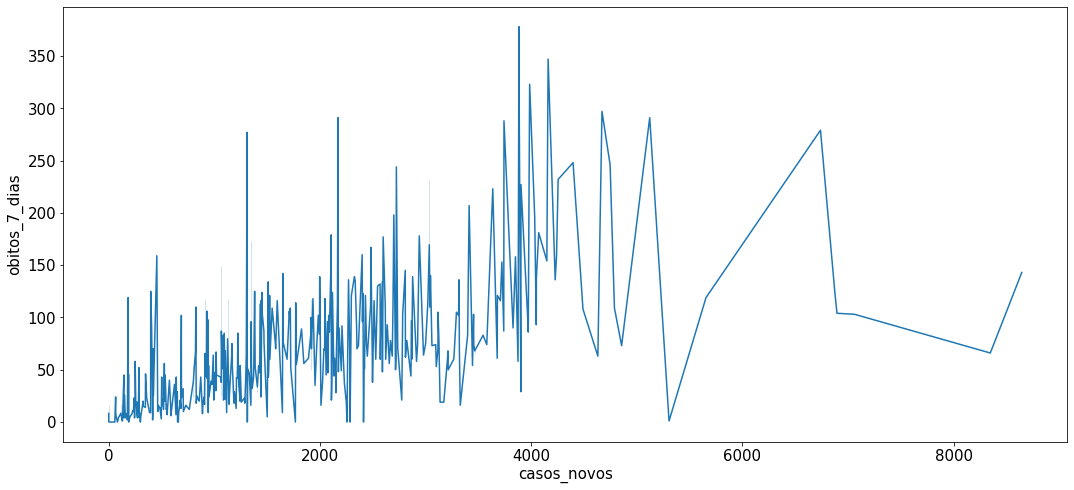

In [44]:
sns.lineplot(x='casos_novos', y='obitos_7_dias', data=dados_sp)

#### Desafio 06

Função de correlação cruzada dos óbitos e casos.  (biblioteca statmodels)
Acho que nunca li tanto para tentar entender um assunto e ainda ficar em dúvida.

Source notebook do [RPGraciotti](https://github.com/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_1_Entendendo_a_serie_temporal.ipynb) e [leobmend](https://github.com/leobmend/Alura-Bootcamp-DataScience/blob/2a8a990bf000bd63015c71bb105938561dc55a0c/modulo_03/alurabcds_mod03_aula01.ipynb) 

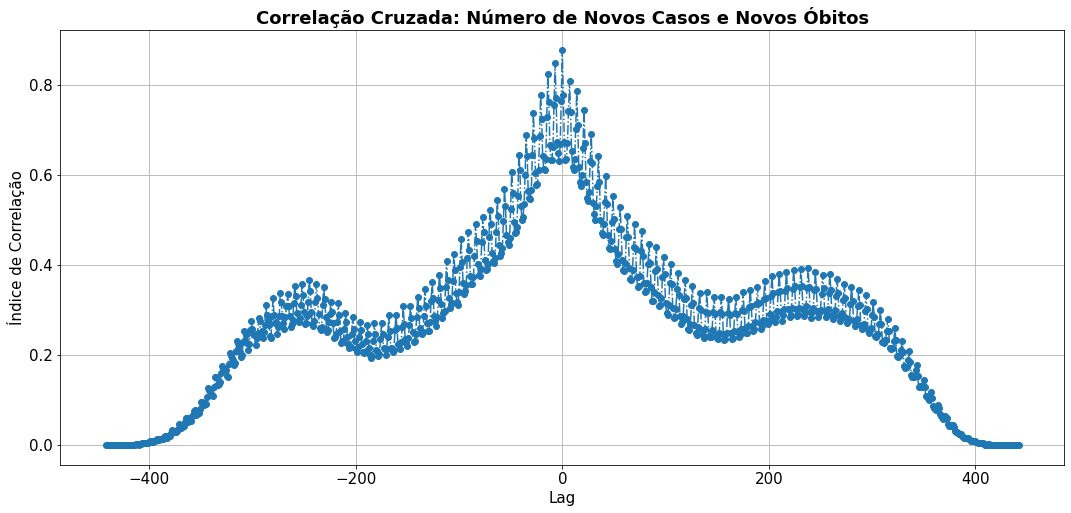

In [45]:
df_plot = dados_sp[['casos_novos','obitos_novos']]
plt.xcorr(x=df_plot['casos_novos'].astype(float), y=df_plot['obitos_novos'].astype(float), maxlags=None, usevlines=False, linestyle='dashdot')

plt.grid()
plt.ylabel('Índice de Correlação')
plt.xlabel('Lag')
plt.title('Correlação Cruzada: Número de Novos Casos e Novos Óbitos', fontweight='bold')

plt.show()

#### Desafio 07

Estudar outros municípios. Retornar aqui quando terminar o curso para fixar aprendizagem.

O que aprendemos nessa aula:

* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.